In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft Yahei', 'SimHei', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 1. 读取数据/数据类型整理

In [4]:
data0=pd.read_excel(r'白酒价格.xlsx',sheet_name='底表').copy()

In [5]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8141 entries, 0 to 8140
Data columns (total 10 columns):
ID           8141 non-null int64
商品名称         8141 non-null object
价格（元）        8139 non-null float64
近30天销量（件）    8141 non-null int64
广告词          4726 non-null object
促销活动         4150 non-null object
评论数          7081 non-null float64
商品链接         8141 non-null object
日期           8141 non-null datetime64[ns]
品牌           8141 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 636.1+ KB


### 鉴于分析目的以及数据的实际业务意义，我们这里选择销售、价格、品牌作为主要分析特征。

In [6]:
data0['ID']=data0['ID'].astype(str)

In [7]:
data0.dtypes


ID                   object
商品名称                 object
价格（元）               float64
近30天销量（件）             int64
广告词                  object
促销活动                 object
评论数                 float64
商品链接                 object
日期           datetime64[ns]
品牌                   object
dtype: object

# 2. 数据去重

In [4]:
fr21=pd.DataFrame([[1,2,3,2,4],[1,3,4,3,4],[1,6,3,8,9],[1,3,4,3,4],[7,3,1,5,4]])
fr21

,0,1,2,3,4
0,1,2,3,2,4
1,1,3,4,3,4
2,1,6,3,8,9
3,1,3,4,3,4
4,7,3,1,5,4


In [5]:
?fr21.drop_duplicates

In [6]:
fr21.drop_duplicates([0,4],keep='first')#第一个参数subset通过选取列确定判断重复的所在子集，第二个参数keep，确定保留重复数据的第一次出现，
#还是保留重复数据的最后一次出现，或者所有的重复数据包括源数据一起全部删掉。

,0,1,2,3,4
0,1,2,3,2,4
2,1,6,3,8,9
4,7,3,1,5,4


In [8]:
fr21.drop_duplicates([0,4],keep='last')

,0,1,2,3,4
2,1,6,3,8,9
3,1,3,4,3,4
4,7,3,1,5,4


In [9]:
fr21.drop_duplicates(keep='first')

,0,1,2,3,4
0,1,2,3,2,4
1,1,3,4,3,4
2,1,6,3,8,9
4,7,3,1,5,4


### 回到项目中

In [8]:
data0=data0.drop_duplicates(keep='first')

In [9]:
data0.shape

(8133, 10)

In [10]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8133 entries, 0 to 8140
Data columns (total 10 columns):
ID           8133 non-null object
商品名称         8133 non-null object
价格（元）        8131 non-null float64
近30天销量（件）    8133 non-null int64
广告词          4721 non-null object
促销活动         4147 non-null object
评论数          7073 non-null float64
商品链接         8133 non-null object
日期           8133 non-null datetime64[ns]
品牌           8133 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 698.9+ KB


### data0的数据总共8133行，而我们的特征‘近30天销量’刚好8133行数据。这就说明该特征列没有空值数据，无需补值。

### 但价格需要补值，这里我们采用就近补值

# 3. 数据补值

In [12]:
data0['价格（元）']=data0['价格（元）'].fillna(method='bfill')#就近补值


In [13]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8133 entries, 0 to 8140
Data columns (total 10 columns):
ID           8133 non-null object
商品名称         8133 non-null object
价格（元）        8133 non-null float64
近30天销量（件）    8133 non-null int64
广告词          4721 non-null object
促销活动         4147 non-null object
评论数          7073 non-null float64
商品链接         8133 non-null object
日期           8133 non-null datetime64[ns]
品牌           8133 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 698.9+ KB


### 逻辑值检验（此外还需对0价格进行补值修正）

In [14]:
data0['价格（元）'].max(),data0['价格（元）'].min()

(11512.8, 0.0)

In [15]:
data0.loc[data0['价格（元）']==0,'价格（元）']=int(data0['价格（元）'].mean())#把0价格补成平均值

In [30]:
data0.loc[data0['价格（元）']==345,'价格（元）']

200     345.0
1102    345.0
5879    345.0
6736    345.0
Name: 价格（元）, dtype: float64

In [36]:
print(data0['价格（元）'][1920])
data0['近30天销量（件）'].min()

397.0


0

# 4. 接下来我们以每个月为统计周期对满足不同价格和销量的品牌数量分布图进行可视化。

In [42]:
datalist=list(set(data0['日期' ].astype(str).values))#寻找统计时间点
print(sum([len(data0.loc[data0['日期' ]==daten,:]) for daten in datalist]))
datalist


8133


['2017-07-06',
 '2017-11-03',
 '2017-08-15',
 '2018-01-29',
 '2017-12-01',
 '2017-09-30',
 '2017-05-24',
 '2018-02-27',
 '2017-12-26']

## 这里我们可以任意挑选统计时间点

In [43]:
data1=data0.loc[data0['日期' ]==datalist[6],:]
data1

,ID,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,商品链接,日期,品牌
7379,520673633190,【天猫超市】五粮液股份公司 52度 东方娇子精酿级 500mL 白酒,69.0,816,需要礼袋 请拍双只装,满2件5折,20918.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2017-05-24,五粮液
7380,535760560780,【天猫超市】五粮液股份公司 纳福彰显尊贵 精品级52度500mL白酒,49.9,501,NaN,"满2件,送任意1件赠品（赠完即止）",19534.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2017-05-24,五粮液
7381,521710025064,【天猫超市】洋河海之蓝52度480mlx2瓶蓝色经典之绵柔型白酒,312.0,998,双瓶加礼袋 送礼更有面,NaN,17475.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2017-05-24,洋河
7382,537661115078,【天猫超市】五粮液股份公司富贵天下佳藏52度 500mL浓香型白酒,109.0,2123,NaN,满2件5折,16087.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2017-05-24,五粮液
7383,39369306132,【天猫超市】洋河海之蓝42度375ml蓝色经典之浓香型白酒优惠,92.0,619,单笔订单 送一个礼袋 需多个 拍双支装 见详情页,"满2件,送任意1件赠品（赠完即止）",13967.0,https://chaoshi.detail.tmall.com/item.htm?id=3...,2017-05-24,洋河
...,...,...,...,...,...,...,...,...,...,...
8136,43242702173,【天猫超市】五粮液 绵柔尖庄 红标50度500ml 正品白酒 浓香白酒,69.0,8,NaN,NaN,NaN,https://chaoshi.detail.tmall.com/item.htm?id=4...,2017-05-24,五粮液
8137,521062915065,【天猫超市】景芝 景芝老窖 46度500ml 浓香型白酒 山东名酒,29.0,16,NaN,"满2件 ,送任意1件赠品（赠完即止）",NaN,https://chaoshi.detail.tmall.com/item.htm?id=5...,2017-05-24,景芝
8138,43066022456,【天猫超市】53度茅台迎宾酒（2013款）500ml*6瓶整箱酒厂直供,408.0,1,NaN,NaN,NaN,https://chaoshi.detail.tmall.com/item.htm?id=4...,2017-05-24,茅台
8139,538926498510,【天猫超市】安达情闷倒驴45度白大闷500ml*12清香型白酒整箱装,108.0,1,NaN,NaN,NaN,https://chaoshi.detail.tmall.com/item.htm?id=5...,2017-05-24,安达情


In [45]:
price_int=np.ceil((data1['价格（元）'].max()-data1['价格（元）'].min())/60)

price_int,data1['价格（元）'].max(),data1['价格（元）'].min()

(160.0, 9594.0, 5.5)

In [47]:
data_price_x=[(data1['价格（元）'].min()-1)+j*(price_int) for j in range(0,61)]
data_price_x

[4.5,
 164.5,
 324.5,
 484.5,
 644.5,
 804.5,
 964.5,
 1124.5,
 1284.5,
 1444.5,
 1604.5,
 1764.5,
 1924.5,
 2084.5,
 2244.5,
 2404.5,
 2564.5,
 2724.5,
 2884.5,
 3044.5,
 3204.5,
 3364.5,
 3524.5,
 3684.5,
 3844.5,
 4004.5,
 4164.5,
 4324.5,
 4484.5,
 4644.5,
 4804.5,
 4964.5,
 5124.5,
 5284.5,
 5444.5,
 5604.5,
 5764.5,
 5924.5,
 6084.5,
 6244.5,
 6404.5,
 6564.5,
 6724.5,
 6884.5,
 7044.5,
 7204.5,
 7364.5,
 7524.5,
 7684.5,
 7844.5,
 8004.5,
 8164.5,
 8324.5,
 8484.5,
 8644.5,
 8804.5,
 8964.5,
 9124.5,
 9284.5,
 9444.5,
 9604.5]

In [58]:
sales_int=(data1['近30天销量（件）'].max()-data1['近30天销量（件）'].min())/15
sales_int,data1['近30天销量（件）'].max(),data1['近30天销量（件）'].min()

(508.6666666666667, 7630, 0)

In [59]:
data_sales_y=np.ceil([(data1['近30天销量（件）'].min()-1)+k*(sales_int+1) for k in range(0,16)]).tolist()
data_sales_y

[-1.0,
 509.0,
 1019.0,
 1528.0,
 2038.0,
 2548.0,
 3057.0,
 3567.0,
 4077.0,
 4586.0,
 5096.0,
 5606.0,
 6115.0,
 6625.0,
 7135.0,
 7644.0]

In [ ]:
#检查ID是否有重复

In [60]:
def check_inf(data1,data_price_x1,data_sales_y1,i,j):
    dadir=data1[(data1['价格（元）']>data_price_x1[i])&(data1['价格（元）']<=data_price_x1[i+1])&(data1['近30天销量（件）']>data_sales_y1[j])&(data1['近30天销量（件）']<=data_sales_y1[j+1])]
    ser_id=dadir['ID'].value_counts()
    ser_id.name='IDNr'
    fr_ser=pd.DataFrame(ser_id)
    fr_ser['品牌']=[ list(set(data1.loc[data1['ID']==id,'品牌']))[0] for id in ser_id.index]
    return len(dadir),print(fr_ser)

In [61]:
X1=data1.loc[(data1['价格（元）']>data_price_x[0])&(data1['价格（元）']<=data_price_x[1])& (data1['近30天销量（件）']>data_sales_y[0])&(data1['近30天销量（件）']<=data_sales_y[1]),:]
X2=X1['ID'].value_counts()
X2.name='IDNr'
X3=pd.DataFrame(X2)
X3['品牌']=[ list(set(data1.loc[data1['ID']==id,'品牌']))[0] for id in X2.index]
#list(set(data1.loc[data1['ID']=='522000491585','品牌']))[0]
X3

,IDNr,品牌
540455698359,1,汾酒
526247135948,1,洋河
538890010150,1,五粮液
530248385100,1,牛栏山
541976871026,1,西凤
...,...,...
540448596766,1,稻花香
535640064386,1,汾酒
533909513991,1,汾酒
531973079843,1,红星


In [62]:
#data
def plot_inf(data1,data_price_x2,data_sales_y2,j_sales):
    X=[];H=[];Info=[]
    for kz in range(60):
        h,info=check_inf(data1,data_price_x2,data_sales_y2,kz,j_sales)
        X.append(str(data_price_x2[kz])+'-'+str(data_price_x2[kz+1]))  # 价格分组
        H.append(h);Info.append(info)  # 酒的ID和品牌名，H是接收这个分组有多少数据的列表统计len
        Y=data_sales_y2[j_sales+1]    # 销售量分组定位
    return X,H,Y,Info

              IDNr   品牌
540455698359     1   汾酒
526247135948     1   洋河
538890010150     1  五粮液
530248385100     1  牛栏山
541976871026     1   西凤
...            ...  ...
540448596766     1  稻花香
535640064386     1   汾酒
533909513991     1   汾酒
531973079843     1   红星
525495267894     1  牛栏山

[314 rows x 2 columns]
              IDNr   品牌
522658723080     1  五粮液
539946946763     1  五粮液
538851184959     1   金门
538694440581     1  白云边
521996461927     1   郎酒
...            ...  ...
536716897142     1   董酒
19160658297      1   习酒
21463719686      1   习酒
524826632201     1  剑南春
530176795237     1  牛栏山

[157 rows x 2 columns]
              IDNr    品牌
540336737605     1  泸州老窖
531456357282     1   五粮液
537739922759     1   白云边
530844919544     1   五粮液
18602297168      1   剑南春
...            ...   ...
530418095162     1   剑南春
523919198159     1    董酒
540125797262     1   五粮液
540301729847     1  泸州老窖
540337618498     1   五粮液

[95 rows x 2 columns]
              IDNr     品牌
43420720721      1    剑南春
5

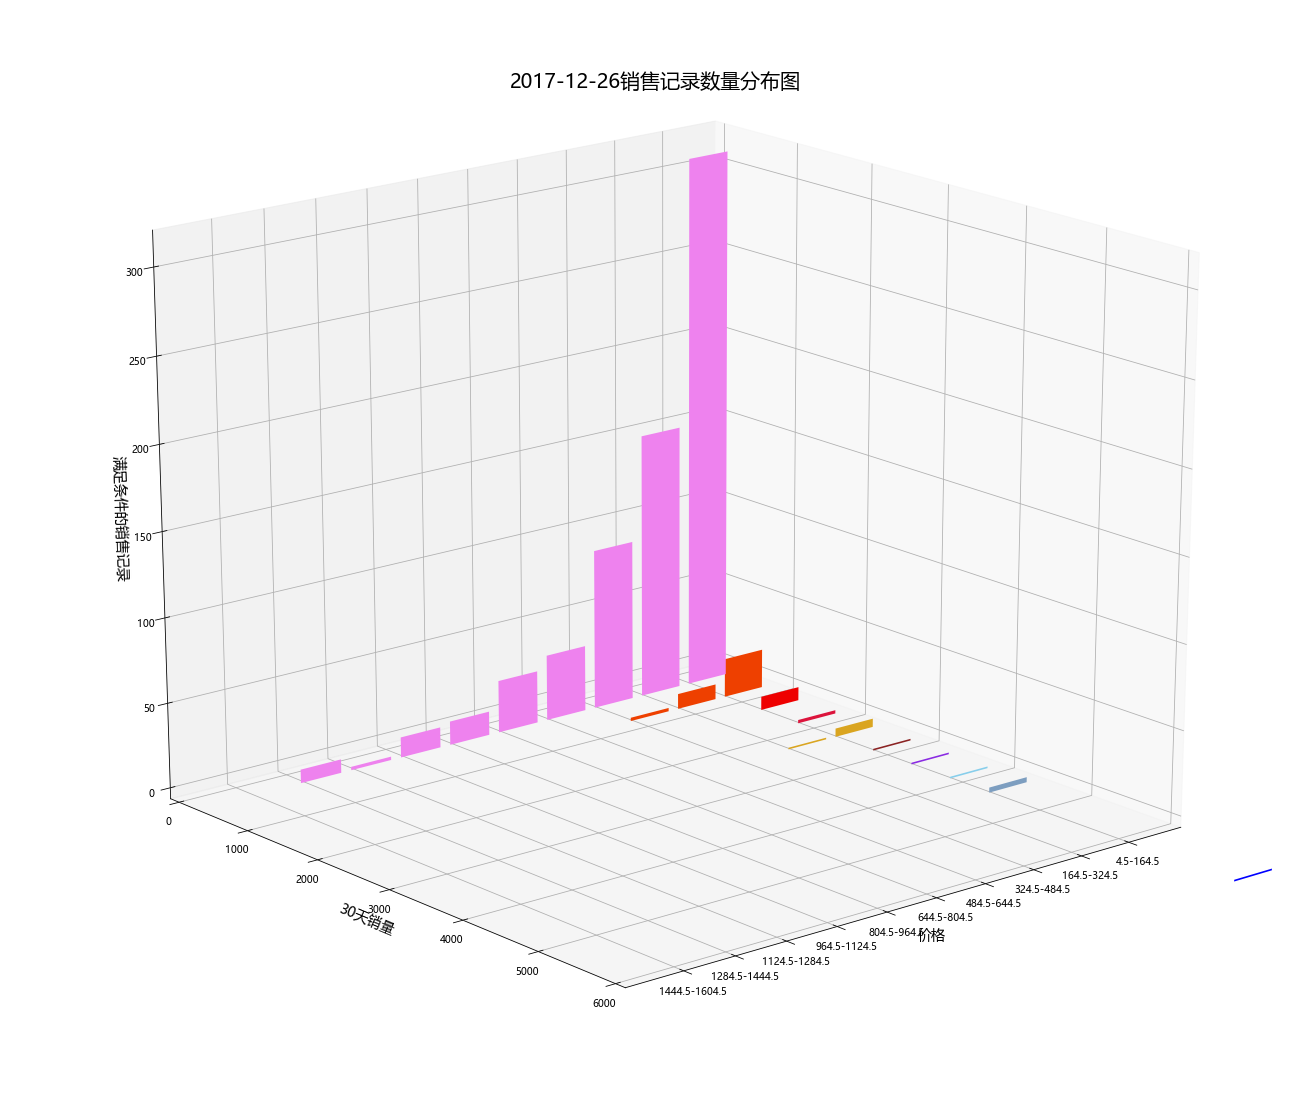

In [64]:
fig=plt.figure(figsize=(18,15))
ax=Axes3D(fig)
cl_list=['#EE82EE','#EE4000','#EE0000','#DC143C','#DAA520','#8B2323','#8A2BE2','#87CEEB','#7D9EC0','#7CCD7C','#76EE00','#68228B','#4EEE94','#404040','#0000FF']
for sz in zip(range(15),cl_list):
    data_plot=plot_inf(data1,data_price_x,data_sales_y,sz[0])
    print(data_plot[0][:5],data_plot[1][:5],data_plot[2],sz[0])
    ax.bar(data_plot[0][:10],data_plot[1][:10],data_plot[2],zdir='y',color=sz[1])#ax.bar([列表，元素可以数字和字符串]，[只能是数值]，单个数值)
plt.xlabel('价格',fontsize=14)
plt.ylabel('30天销量',fontsize=14)
ax.set_zlabel('满足条件的销售记录',fontsize=14)
ax.set_title(str(datalist[8])+'销售记录数量分布图',fontsize=20)#这里必须修改统计时间点
plt.ylim([0,6000])
ax.view_init(elev=20,azim=50)

#### 从上面的单月品牌数量分布直方图说明产生成交的品牌具有以下两个特征：
#### 1.价格大约处在600元以下，尤其集中于300元以下。
#### 2.月成交量大约在0-1800之间

# 5. 行业大盘（2017-2018）表现，各价位段表现

In [65]:
data0.groupby#第一个参数by 指认要分组列，第二个参数轴参数，确定按列还是按行，
#一般按列，也就是说axis=0.第三个参数是as_index,把我们的组标签当作索引返回结果。
#注意groupby适合离散数据分组
list(data0.groupby(by=['品牌']))[0][1]

,ID,商品名称,价格（元）,近30天销量（件）,广告词,促销活动,评论数,商品链接,日期,品牌
939,538031399797,Union进口玻璃杯烈酒杯酒盅白酒杯一口杯小酒杯60ml,4.5,4403,原装进口 健康环保 简洁透明,NaN,5290.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-01-29,Union
963,538195148427,Union进口玻璃杯烈酒杯酒盅白酒杯一口杯小酒杯55ml,4.9,2652,原装进口 健康环保,NaN,3493.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-01-29,Union
1109,541180993694,Union进口玻璃杯烈酒白酒杯一口杯洋酒小酒杯2只装55ml,9.2,289,原装进口 健康环保 简洁明亮,满2件7.5折,1013.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-01-29,Union
1116,541188343393,Union进口玻璃杯烈酒白酒杯一口杯洋酒小酒杯2只装60ml,8.5,384,原装进口 健康环保 简洁明亮,满2件7.5折,968.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-01-29,Union
1141,541187255049,Union进口玻璃杯烈酒白酒杯一口杯洋酒小酒杯6只装60ml,24.9,931,原装进口 健康环保 简洁明亮,满2件7.5折,850.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-01-29,Union
1164,541172392072,Union进口玻璃杯烈酒白酒杯一口杯洋酒小酒杯6只装55ml,26.9,750,原装进口 健康环保 简洁明亮,满2件7.5折,759.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2018-01-29,Union
1982,538031399797,Union进口玻璃杯烈酒杯酒盅白酒杯一口杯小酒杯60ml,4.5,5954,原装进口 健康环保 简洁透明,NaN,4585.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2017-12-26,Union
2006,538195148427,Union进口玻璃杯烈酒杯酒盅白酒杯一口杯小酒杯55ml,4.9,3285,原装进口 健康环保,NaN,3051.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2017-12-26,Union
2137,541180993694,Union进口玻璃杯烈酒白酒杯一口杯洋酒小酒杯2只装55ml,9.2,156,原装进口 健康环保 简洁明亮,NaN,963.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2017-12-26,Union
2156,541188343393,Union进口玻璃杯烈酒白酒杯一口杯洋酒小酒杯2只装60ml,8.5,187,原装进口 健康环保 简洁明亮,NaN,861.0,https://chaoshi.detail.tmall.com/item.htm?id=5...,2017-12-26,Union


In [131]:
#[list(data0.groupby(by=['日期','品牌']))[j][1] for j in range(len(list(data0.groupby(by=['日期','品牌']))))]

In [106]:
data0.groupby(by=['品牌'])['近30天销量'].sum()

品牌
Union     20058
习酒        40085
五粮液      489881
伊力特        2244
八八坑        1143
剑南春       82432
劲牌         2726
劲酒       104069
双沟         6125
双沟君坊       2301
双沟醴泉       1348
古井贡酒      93954
古越龙山       2894
喜碧曼           8
四特        14287
国台         1056
天佑德        8972
安达情        3079
小糊涂仙      19448
年份原浆       3521
景芝          389
杜康          415
樱花汇         285
欧欣          897
水井坊        8288
江小白      150486
汾酒        93788
泸州老窖     165793
洋河       283055
牛栏山      386274
珍酒         1268
白云边       28325
白水杜康       1338
稻花香        5862
红星       254713
致中和       19180
舒可曼        1248
茅台       227210
董酒         4826
衡水老白干     25694
西凤        27863
贵州国台         79
赖茅         1257
迎驾贡酒       5225
郎酒        44790
酒鬼酒         428
金六福        1783
金门        14023
飞天不老      37670
黄金酒         327
Name: 近30天销量, dtype: int64

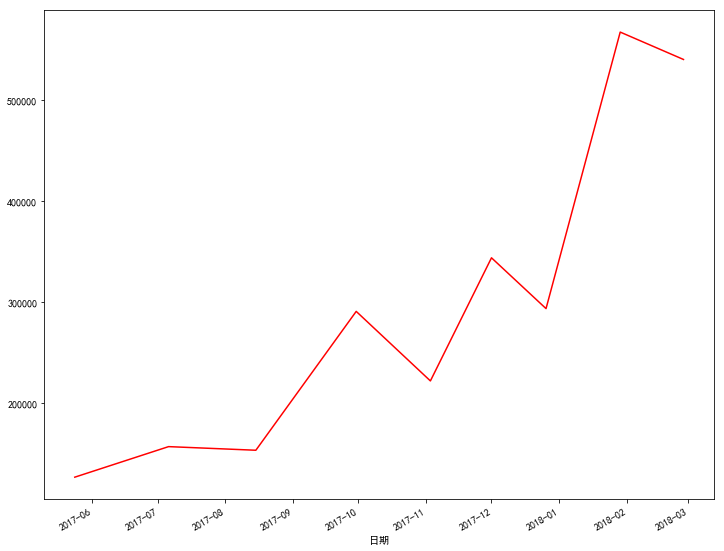

In [111]:
dfg,asx=plt.subplots(1,1,figsize=(12,10))
(data0.groupby('日期')['近30天销量'].sum()).plot(kind='line',ax=asx,c='r')
#data0.groupby('日期')['近30天销量'].sum()

4.0 580.0
580.0 1157.0
1157.0 1733.0
1733.0 2310.0
2310.0 2886.0
2886.0 3462.0
3462.0 4039.0
4039.0 4615.0
4615.0 5192.0
5192.0 5768.0
5768.0 6345.0
6345.0 6921.0
6921.0 7497.0
7497.0 8074.0
8074.0 8650.0
8650.0 9227.0
9227.0 9803.0
9803.0 10379.0
10379.0 10956.0
10956.0 11532.0


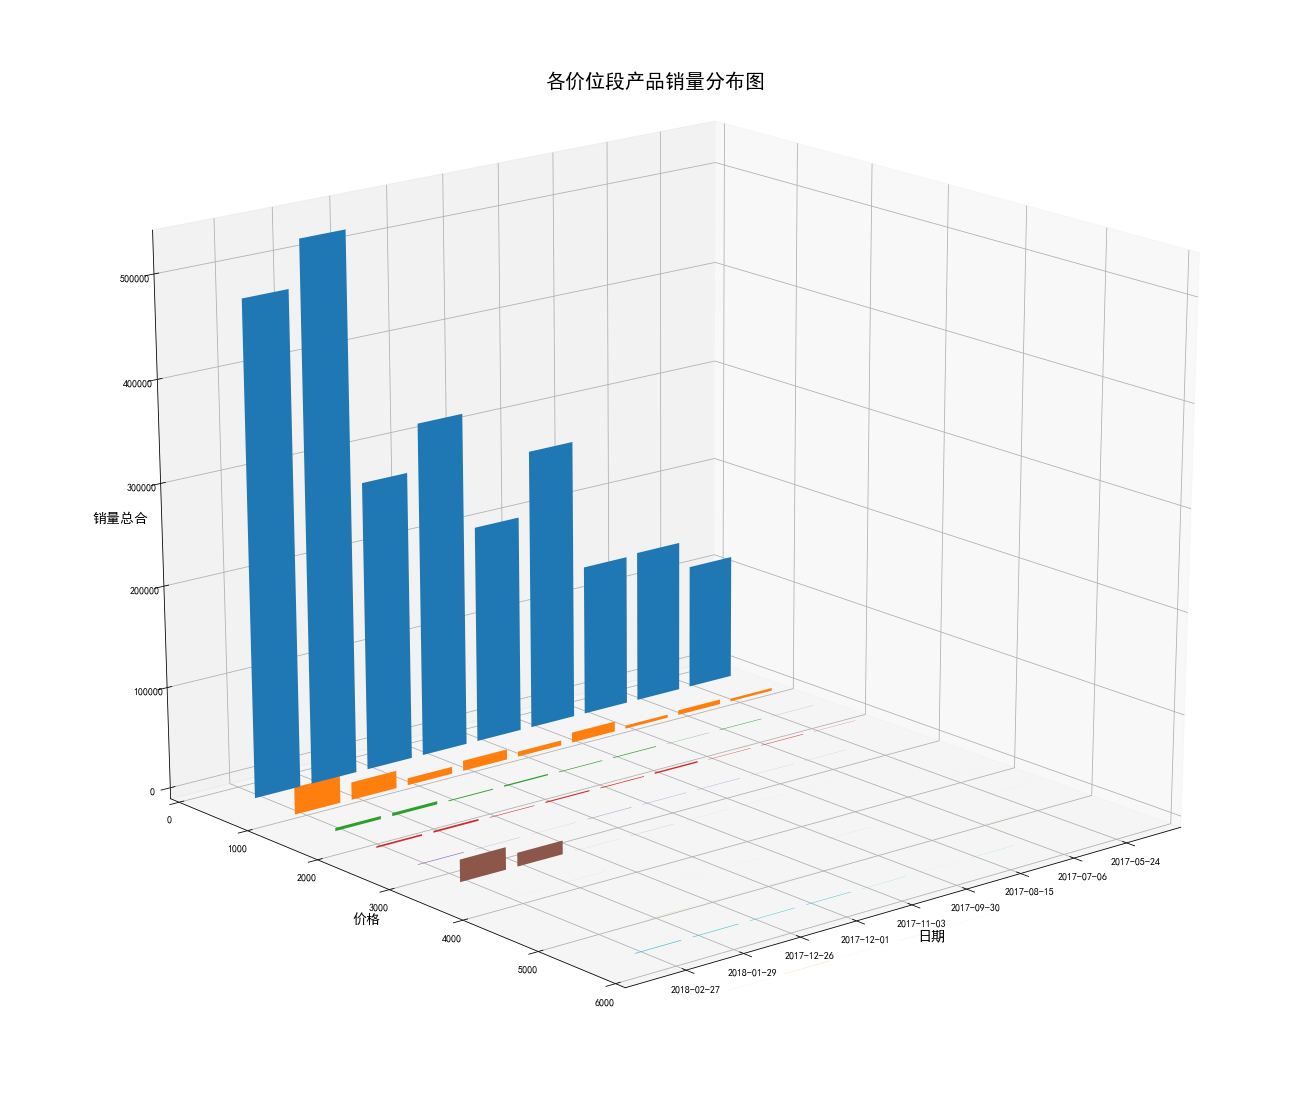

In [115]:
fig=plt.figure(figsize=(18,15))
ax=Axes3D(fig)
price_int1=(data0['价格'].max()-data0['价格'].min())/20
data_price_x1=np.ceil([(data0['价格'].min()-1)+j*(price_int1+1) for j in range(0,21)]).tolist() # 分成20组，价格
for prz in range(len(data_price_x1)-1):
    data_ind=data0.loc[(data0['价格']>data_price_x1[prz])&(data0['价格']<=data_price_x1[prz+1]),:] # 将数据中的价格分进对应的价格组，将整条数据加入进去
    ser_data=data_ind.groupby('日期')['近30天销量'].sum() # 按日期分组，将每月的所有数据的销量求和
    X_val,Sal_val=list(ser_data.index.astype(str)),ser_data.values
    ax.bar( X_val,Sal_val,data_price_x1[prz+1],zdir='y')
    print(data_price_x1[prz],data_price_x1[prz+1])
plt.xlabel('日期',fontsize=14)
plt.ylabel('价格',fontsize=14)
ax.set_zlabel('销量总合',fontsize=14)
ax.set_title('各价位段产品销量分布图',fontsize=20)
plt.ylim([0,6000])#限制价格范围，局部观察每个条形图系列
ax.view_init(elev=20,azim=50)

## 观察上面的线图和三维直方图可得下面的结论：
## 1. 全价位段行业大盘走势整体呈上升趋势。从第一个统计周期2017-05-24起开始缓慢增长至2017-08-15。然后进入快速增长阶段，然而在2017-11和2018-01两个统计周期分别下降到局部谷底值，

## 随后急剧增长至峰值。

## 2. 各价位段行业大盘销量变化趋势十分雷同于整体全价位段行业大盘销量变化趋势
## 3. 产品销量主要主要集中于4-580这个价位段。

# 6.如何评价江小白品牌？

日期
2017-05-24    15714
2017-07-06     6855
2017-08-15     7631
2017-09-30    10820
2017-11-03    10922
2017-12-01    20420
2017-12-26    19640
2018-01-29    28599
2018-02-27    29885
Name: 近30天销量, dtype: int64

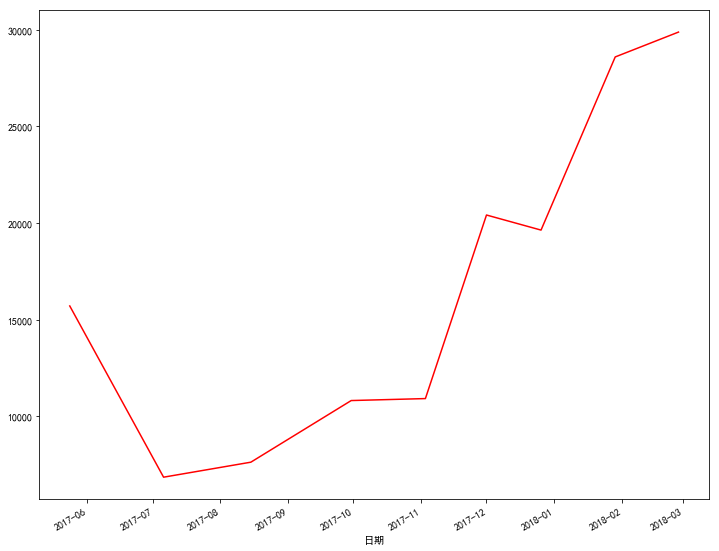

In [138]:
dfg1,asx1=plt.subplots(1,1,figsize=(12,10))
data0.loc[data0['品牌']=='江小白',:].groupby('日期')['近30天销量'].sum().plot(kind='line',ax=asx1,c='r')
data0.loc[data0['品牌']=='江小白',:].groupby('日期')['近30天销量'].sum()

#### 从第一个统计节点开始直至第二个统计节点，江小白销量急速下降，随后进入缓慢增长期直至统计节点2017-11-03.此后进入急剧增长期直至统计节点2018-02-27，达到峰值。

In [126]:
#对江小白进行结构化分析
data2=data0.loc[data0['品牌']=='江小白',:].groupby(['日期','ID'])['近30天销量'].sum()
data2['2017-05-24'].sort_values()
#list(data0.loc[data0['品牌']=='江小白',:].groupby(['日期','ID']))

ID
542550068847      30
543549476618      55
536834250302      64
542571033086      79
536834494769      83
542543760623     143
539368049069     160
542569577352     243
542584358321     258
542582083693     441
536872453030     648
536909880348     926
536909908299    2045
536909884345    2909
536871917851    7630
Name: 近30天销量, dtype: int64

In [149]:
data3=data0.loc[data0['品牌']=='江小白',:].groupby(['ID'])['近30天销量'].sum()
data3.sort_values(ascending=False)

ID
536909908299    59216
536872453030    18012
536909880348    15097
536871917851    14422
554149816345    12175
542582083693     5937
536834494769     4191
536909884345     3750
542569577352     3332
542543760623     3135
554298843374     2859
542571033086     1532
537013830676     1525
539368049069     1109
557978064100      809
536834250302      736
558181279628      562
542584358321      541
562434433873      482
557752048412      423
557151324937      294
543549476618      137
542550068847      115
559886811509       95
Name: 近30天销量, dtype: int64

In [30]:
#for j in data2.index.levels[0]:
    #print(data2[j].sort_values(ascending=False))

#### 江小白销量的前5分别是ID：536909908299、536872453030、536909880348、536871917851、554149816345


# 从中总结出他们的共性

In [151]:
data3=(data0.groupby('品牌')['近30天销量'].sum()).sort_values(ascending=False)


In [152]:
name_list=data3[data3>120000].index.tolist()
name_list

['五粮液', '牛栏山', '洋河', '红星', '茅台', '泸州老窖', '江小白']

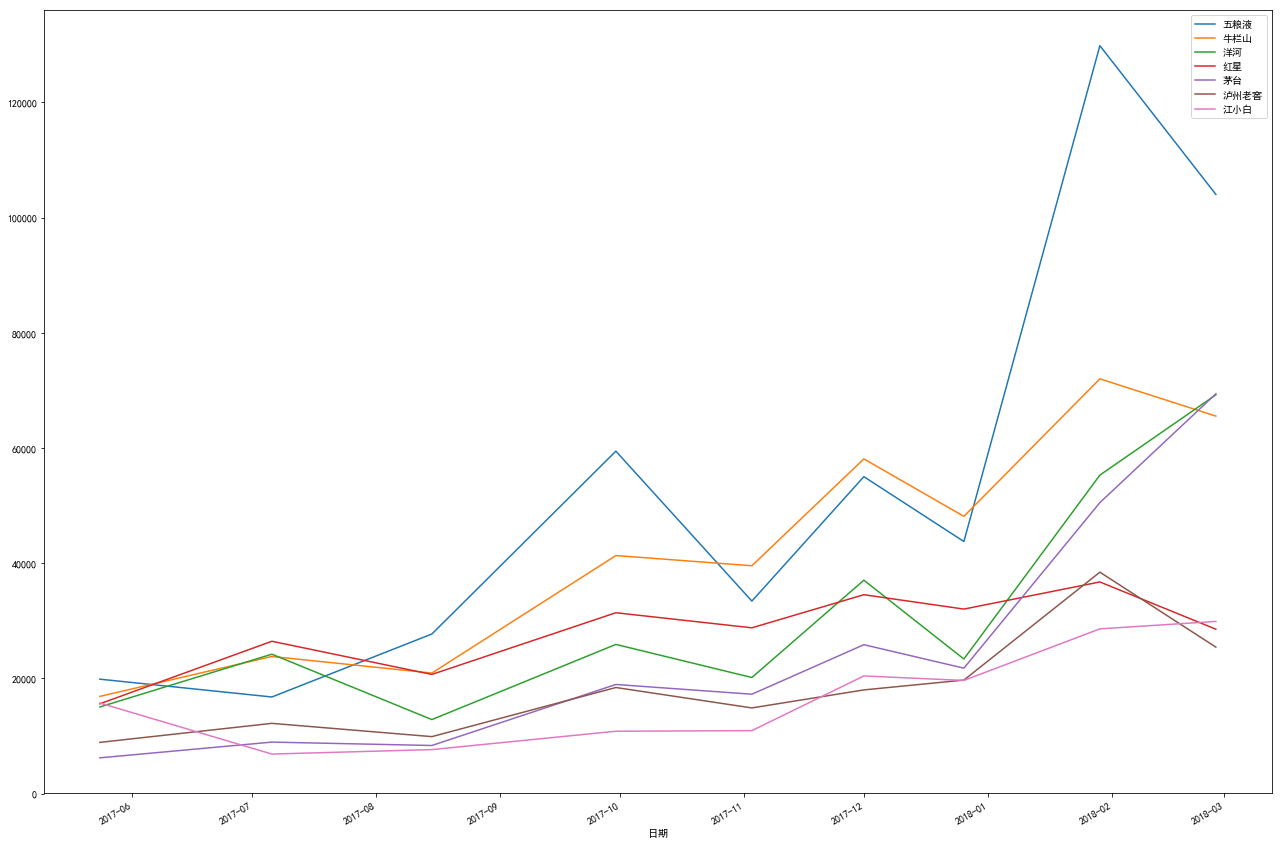

In [153]:
dfg3,asx3=plt.subplots(1,1,figsize=(22,16))
for pn in name_list:
    data0[data0['品牌']==pn].groupby('日期')['近30天销量'].sum().plot(kind='line',ax=asx3,label=pn,legend=True)

#### 从上图中我们发现各品牌销量的变化基本趋于一致，且整体均呈上升趋势。但是各品牌销量增长/减少幅度的变化以及销量水平
#### 的差别。首先观察江小白销量发展趋势图，尽管其整体呈上升趋势，然而销量幅度变化却十分平缓且销售量一直在以上品牌中处于最低状态。与茅台相比，泸州老窖
#### 在2018-02之前其销量趋势基本与茅台类似，仅整体销售量略低于茅台。然而在2018-02之后，泸州老窖在销量上出现拐点，茅台却大约从2018-01月始进入销量的高速增长期，直至2018年3月。洋河的销售趋势与茅台整体几乎相同，仅整体销量要略高于茅台。红星、牛栏山和五粮液三者变化趋势大致一致，但是红星在2018-02之前变化幅度十分平缓，整体无大幅度上下摆动，而五粮液与牛栏山的销量却一致处于大幅度摆动中。从销量水平上来看，五粮液最高，牛栏山居中，红星最低。

